# Federated Learning Simulation Runner + Metrics Visualization

## Flower Simulation

### Rounds 1–3

In [1]:
!flwr run

Loading project configuration... 
Success
Map: 100%|█████████████████████████| 7200/7200 [00:01<00:00, 6372.51 examples/s]
INFO :      Starting Flower ServerApp, config: num_rounds=3, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
Evaluating (centralized)...: 100%|████████████| 300/300 [01:25<00:00,  3.49it/s]
INFO :      initial parameters (loss, other metrics): 1.099992838303248, {'centralized_accuracy': 0.3575, 'centralized_precision': 0.2865652044320775, 'centralized_recall': 0.3574767978934646, 'centralized_f1_score': 0.31811717651385374}
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 2 clients (out of 4)
Training (partition 3)...: 100%|██████████| 424/424 [15:55<00:00,  2.25s/it]
INFO :      aggregate_fit: received 2 results and 0 failures
Evaluating (centralized)...: 100%|████████████| 300/300 [01:40<00:00,  2.98it/s]
INF

### Rounds 4–5

In [1]:
!flwr run

Loading project configuration... 
Success
Map: 100%|█████████████████████████| 7200/7200 [00:01<00:00, 6308.32 examples/s]
INFO :      Starting Flower ServerApp, config: num_rounds=2, no round_timeout
INFO :      
INFO :      [INIT]
INFO :      Using initial global parameters provided by strategy
INFO :      Starting evaluation of initial global parameters
Evaluating (centralized)...: 100%|████████████| 300/300 [01:25<00:00,  3.50it/s]
INFO :      initial parameters (loss, other metrics): 0.9830811280012131, {'centralized_accuracy': 0.5252777777777777, 'centralized_precision': 0.5785994549778088, 'centralized_recall': 0.5233355625855626, 'centralized_f1_score': 0.5495817202580144}
INFO :      
INFO :      [ROUND 1]
INFO :      configure_fit: strategy sampled 2 clients (out of 4)
Training (partition 2)...: 100%|██████████| 424/424 [15:41<00:00,  2.22s/it]
INFO :      aggregate_fit: received 2 results and 0 failures
Evaluating (centralized)...: 100%|████████████| 300/300 [01:38<00:00,  3

## Result Analysis and Visualization

In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
with open("./model/results.json", "r") as f:
    data = json.load(f)

data

{'centralized_evaluate': [{'round': 0,
   'centralized_loss': 1.099992838303248,
   'centralized_accuracy': 0.3575,
   'centralized_precision': 0.2865652044320775,
   'centralized_recall': 0.3574767978934646,
   'centralized_f1_score': 0.31811717651385374},
  {'round': 1,
   'centralized_loss': 1.1610970056056977,
   'centralized_accuracy': 0.3333333333333333,
   'centralized_precision': 0.11111111111111109,
   'centralized_recall': 0.3333333333333333,
   'centralized_f1_score': 0.16666666666666663},
  {'round': 2,
   'centralized_loss': 1.0553804918130238,
   'centralized_accuracy': 0.43,
   'centralized_precision': 0.3573470518125811,
   'centralized_recall': 0.42949030599030597,
   'centralized_f1_score': 0.3901113568279943},
  {'round': 3,
   'centralized_loss': 0.9830811280012131,
   'centralized_accuracy': 0.5252777777777777,
   'centralized_precision': 0.5785994549778088,
   'centralized_recall': 0.5233355625855626,
   'centralized_f1_score': 0.5495817202580144},
  {'round': 4,


In [3]:
centralized_metrics = data.get("centralized_evaluate", [])

In [4]:
losses = [metric["centralized_loss"] for metric in centralized_metrics]
accuracies = [metric["centralized_accuracy"] for metric in centralized_metrics]
precisions = [metric["centralized_precision"] for metric in centralized_metrics]
recalls = [metric["centralized_recall"] for metric in centralized_metrics]
f1_scores = [metric["centralized_f1_score"] for metric in centralized_metrics]

In [5]:
epoch_rng = range(0, len(centralized_metrics))

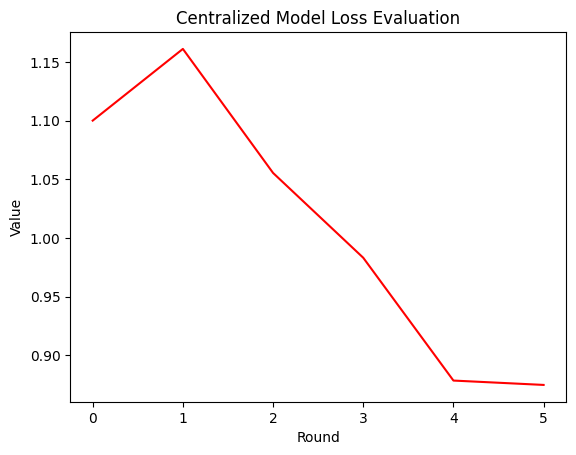

In [6]:
plt.plot(epoch_rng, losses, color="red")

plt.xlabel("Round")
plt.ylabel("Value")

plt.title("Centralized Model Loss Evaluation")
plt.show()

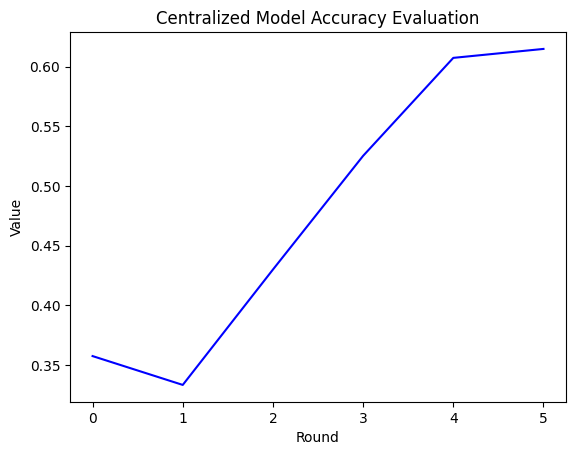

In [7]:
plt.plot(epoch_rng, accuracies, color="blue")

plt.xlabel("Round")
plt.ylabel("Value")

plt.title("Centralized Model Accuracy Evaluation")
plt.show()

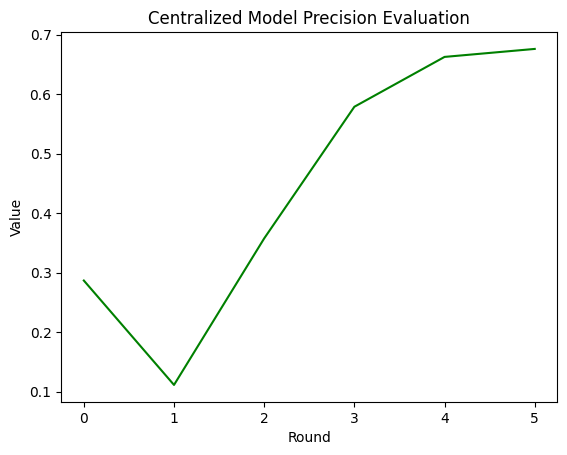

In [8]:
plt.plot(epoch_rng, precisions, color="green")

plt.xlabel("Round")
plt.ylabel("Value")

plt.title("Centralized Model Precision Evaluation")
plt.show()

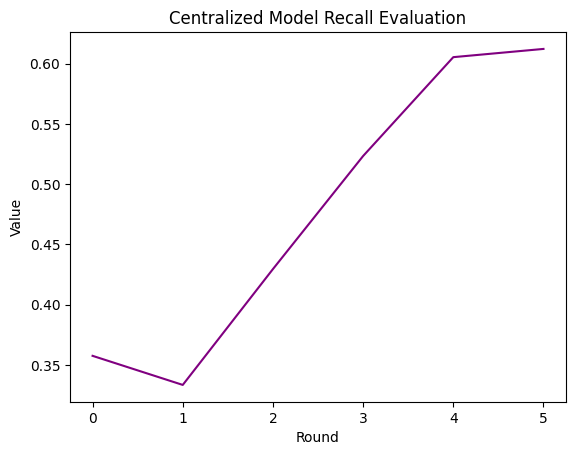

In [9]:
plt.plot(epoch_rng, recalls, color="purple")

plt.xlabel("Round")
plt.ylabel("Value")

plt.title("Centralized Model Recall Evaluation")
plt.show()

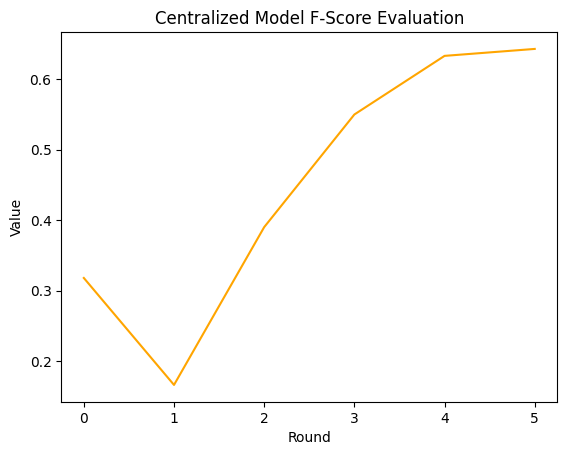

In [10]:
plt.plot(epoch_rng, f1_scores, color="orange")

plt.xlabel("Round")
plt.ylabel("Value")

plt.title("Centralized Model F-Score Evaluation")
plt.show()